In [120]:
import pandas as pnd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [121]:
dataframe = pnd.read_csv(r'kidney_disease.csv')
dataframe.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [122]:
dataframe.shape

(400, 26)

In [123]:
# changing column names for more readability

In [124]:
columns=pnd.read_csv('descriptions.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abbrevations_column_names']

In [125]:
columns

,cols,abbrevations_column_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [126]:
dataframe.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [127]:
dataframe.columns=columns['abbrevations_column_names'].values

In [128]:
dataframe

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [129]:
### Checking datatypes for columns

In [130]:
dataframe.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [131]:
# The columns `red_blood_cell_count`, `packed_cell_volume`, and `white_blood_cell_count` are currently of type `object`.
# We need to change their data type to numerical.

In [132]:
columns_to_convert = ['red blood cell count', 'packed cell volume', 'white blood cell count']

In [133]:
def change_dtype_to_numeric(dataframe, feature):
    dataframe[feature] = pnd.to_numeric(dataframe[feature], errors='coerce')

In [134]:
for column in columns_to_convert:
    change_dtype_to_numeric(dataframe, column)

In [135]:
# Let's drop the `id` column. The `id` column seems to be a unique identifier for each row.
# so we are dropping it as it won't help us find any insights from the data.

In [136]:
dataframe.drop(["id"],axis=1,inplace=True)

In [137]:
# Extracting numerical and categorical features in dataframe.

In [138]:
def extract_categorical_and_numerical(dataframe):
    categorical_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
    numerical_columns = [col for col in dataframe.columns if dataframe[col].dtype != 'object']
    return categorical_columns, numerical_columns

In [139]:
categorical_columns,numerical_columns=extract_categorical_and_numerical(dataframe)

In [140]:
categorical_columns

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [141]:
numerical_columns

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [142]:
### Determine the total number of unique categories in our categorical features to check for any issues or inconsistencies in the data.

In [143]:
for column in categorical_columns:
    unique_values = dataframe[column].unique()
    print(f'{column} has {len(unique_values)} unique values: {unique_values}')
    print('\n')

red blood cells has 3 unique values: [nan 'normal' 'abnormal']


 pus cell has 3 unique values: ['normal' 'abnormal' nan]


pus cell clumps has 3 unique values: ['notpresent' 'present' nan]


bacteria has 3 unique values: ['notpresent' 'present' nan]


ypertension has 3 unique values: ['yes' 'no' nan]


diabetes mellitus has 6 unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]


coronary artery disease has 4 unique values: ['no' 'yes' '\tno' nan]


appetite has 3 unique values: ['good' 'poor' nan]


pedal edema has 3 unique values: ['no' 'yes' nan]


anemia has 3 unique values: ['no' 'yes' nan]


class has 3 unique values: ['ckd' 'ckd\t' 'notckd']




In [144]:
### We need to correct two features and the target variable, which contain certain discrepancies in some values.
### ckd-->> chronic kidney disease
### notckd-->> not chronic kidney disease

In [145]:
#Replace incorrect values

dataframe['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dataframe['coronary artery disease'] = dataframe['coronary artery disease'].replace(to_replace = '\tno', value='no')

dataframe['class'] = dataframe['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [146]:
for column in categorical_columns:
    print('{} has {} values  '.format(column, dataframe[column].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




# Examining the distribution of features

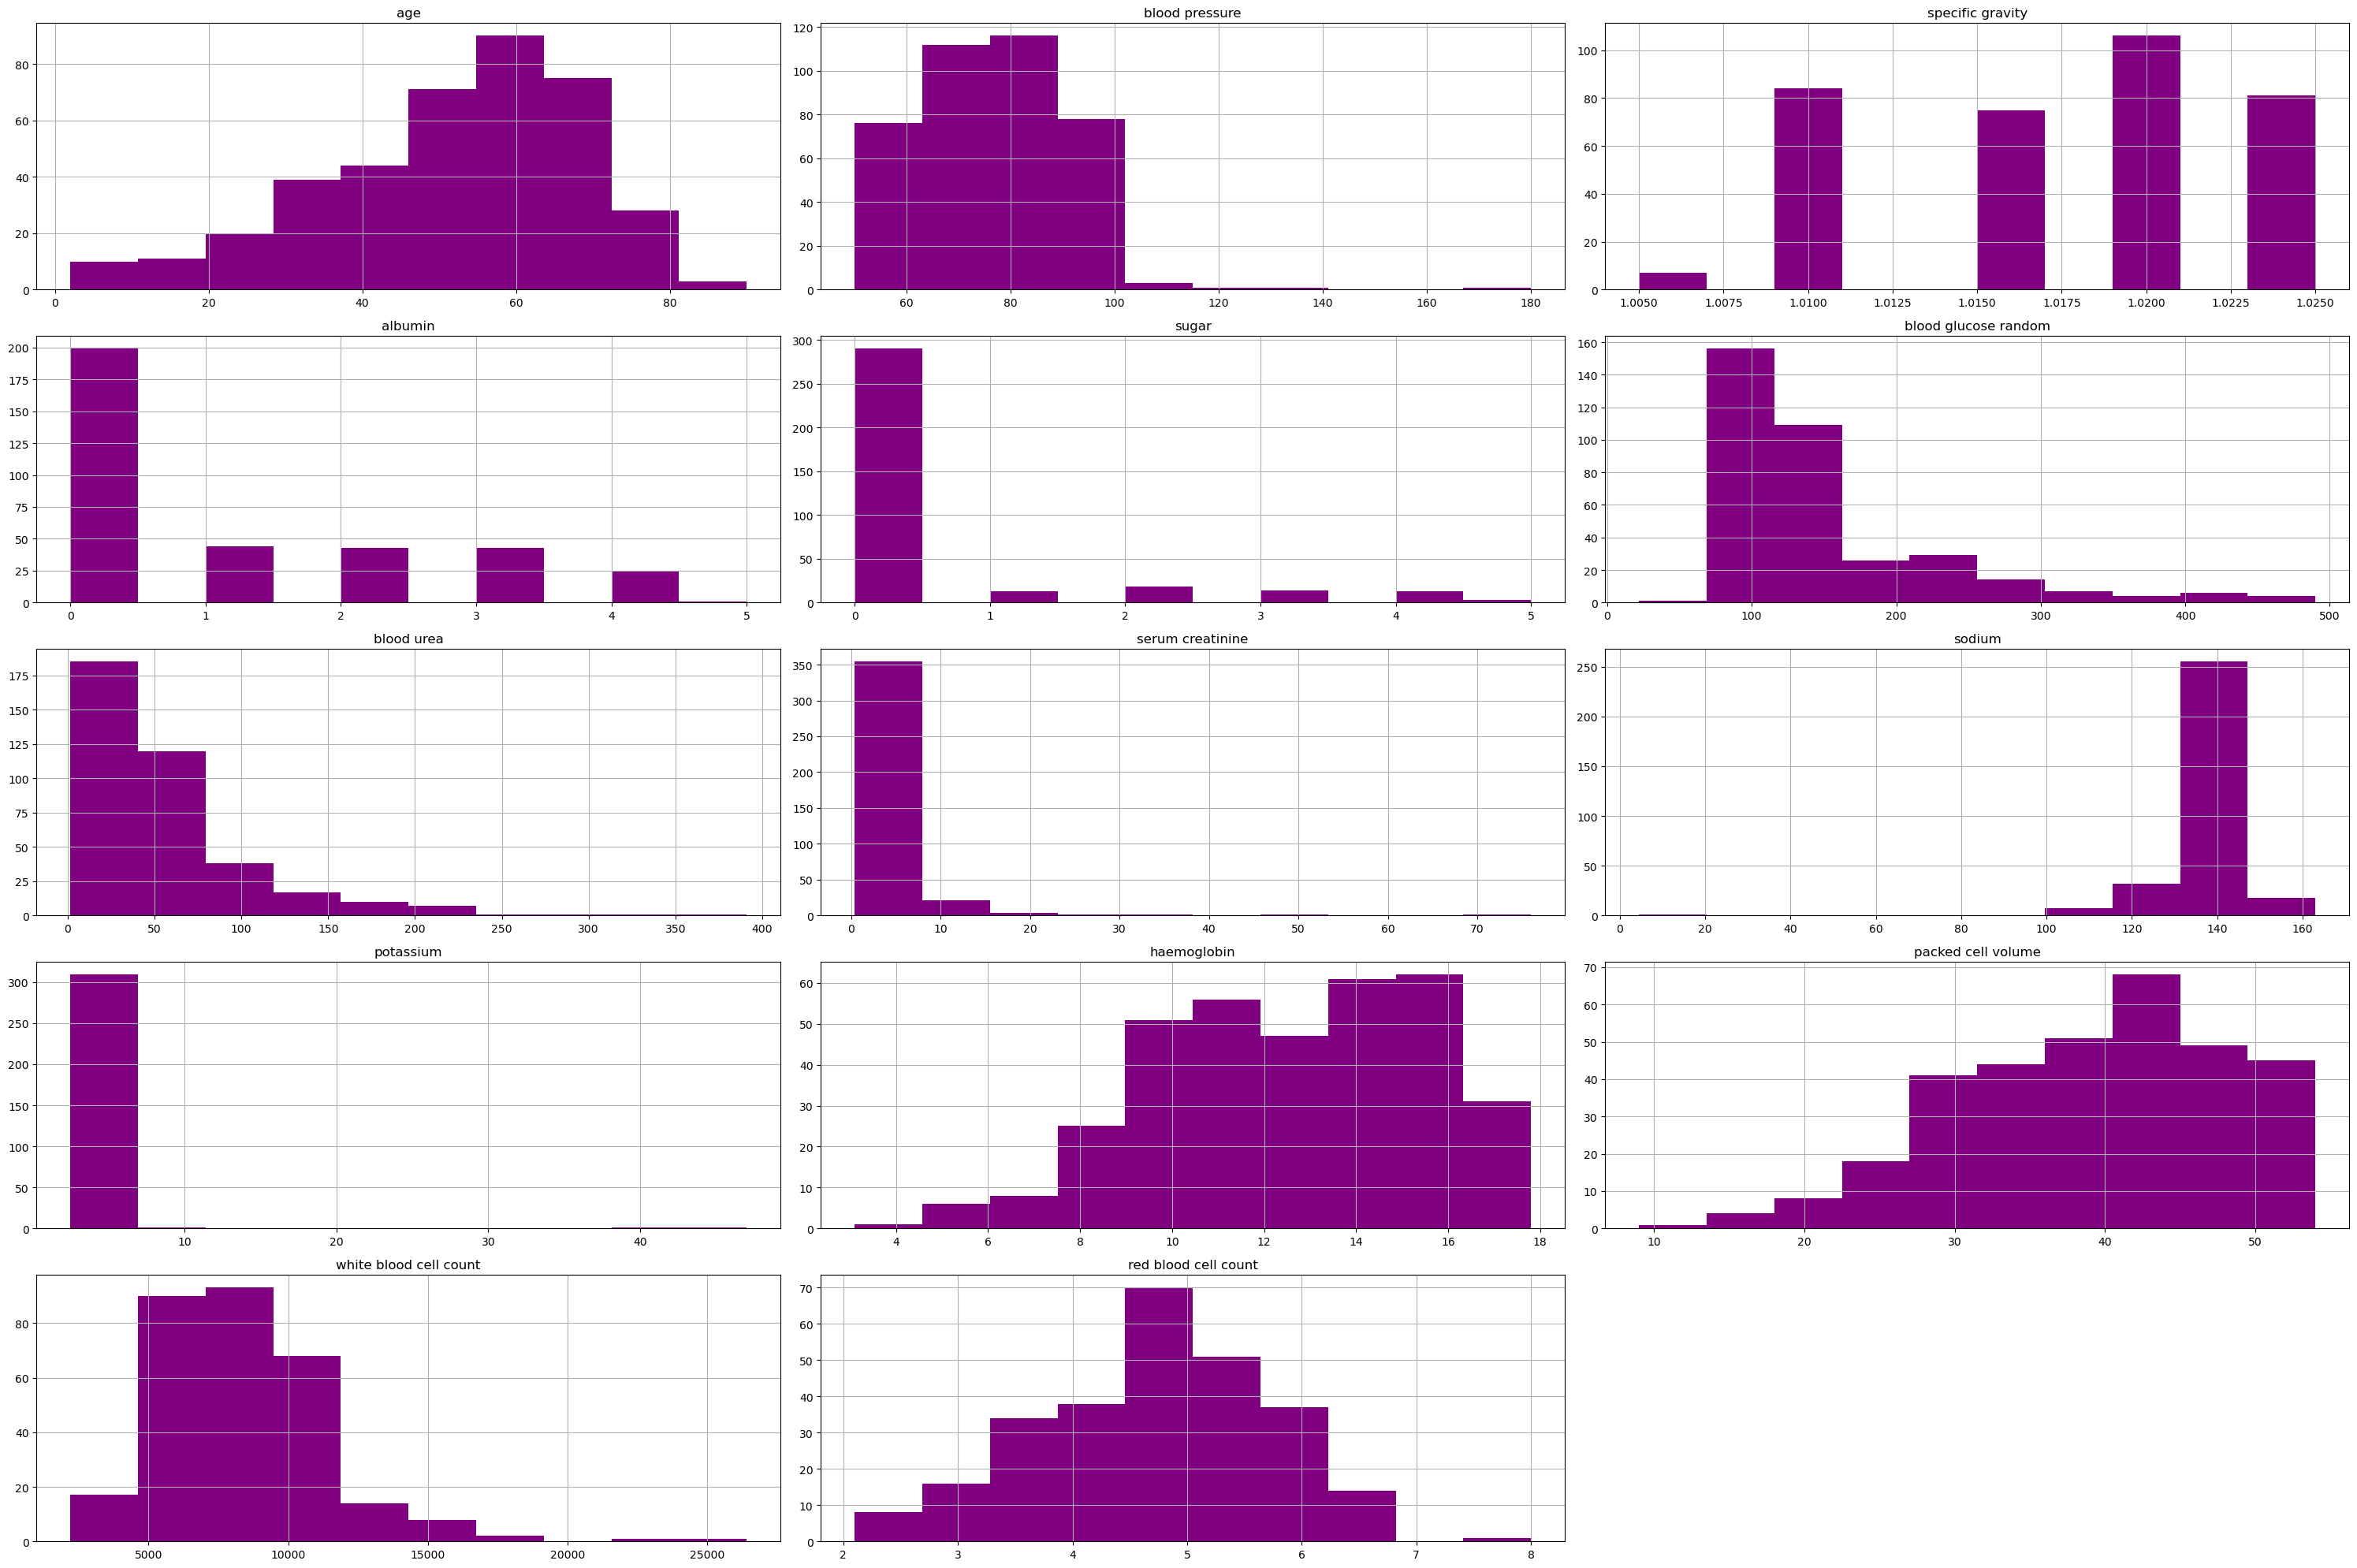

In [147]:
plt.figure(figsize=(30, 20))
for i, feature in enumerate(numerical_columns):
    plt.subplot(5, 3, i + 1)
    dataframe[feature].hist(color='purple')  # Changed color to orange
    plt.title(feature)
plt.tight_layout()
plt.show()

# Now, let's check the label distribution for categorical data

In [148]:
len(categorical_columns)

11

In [149]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

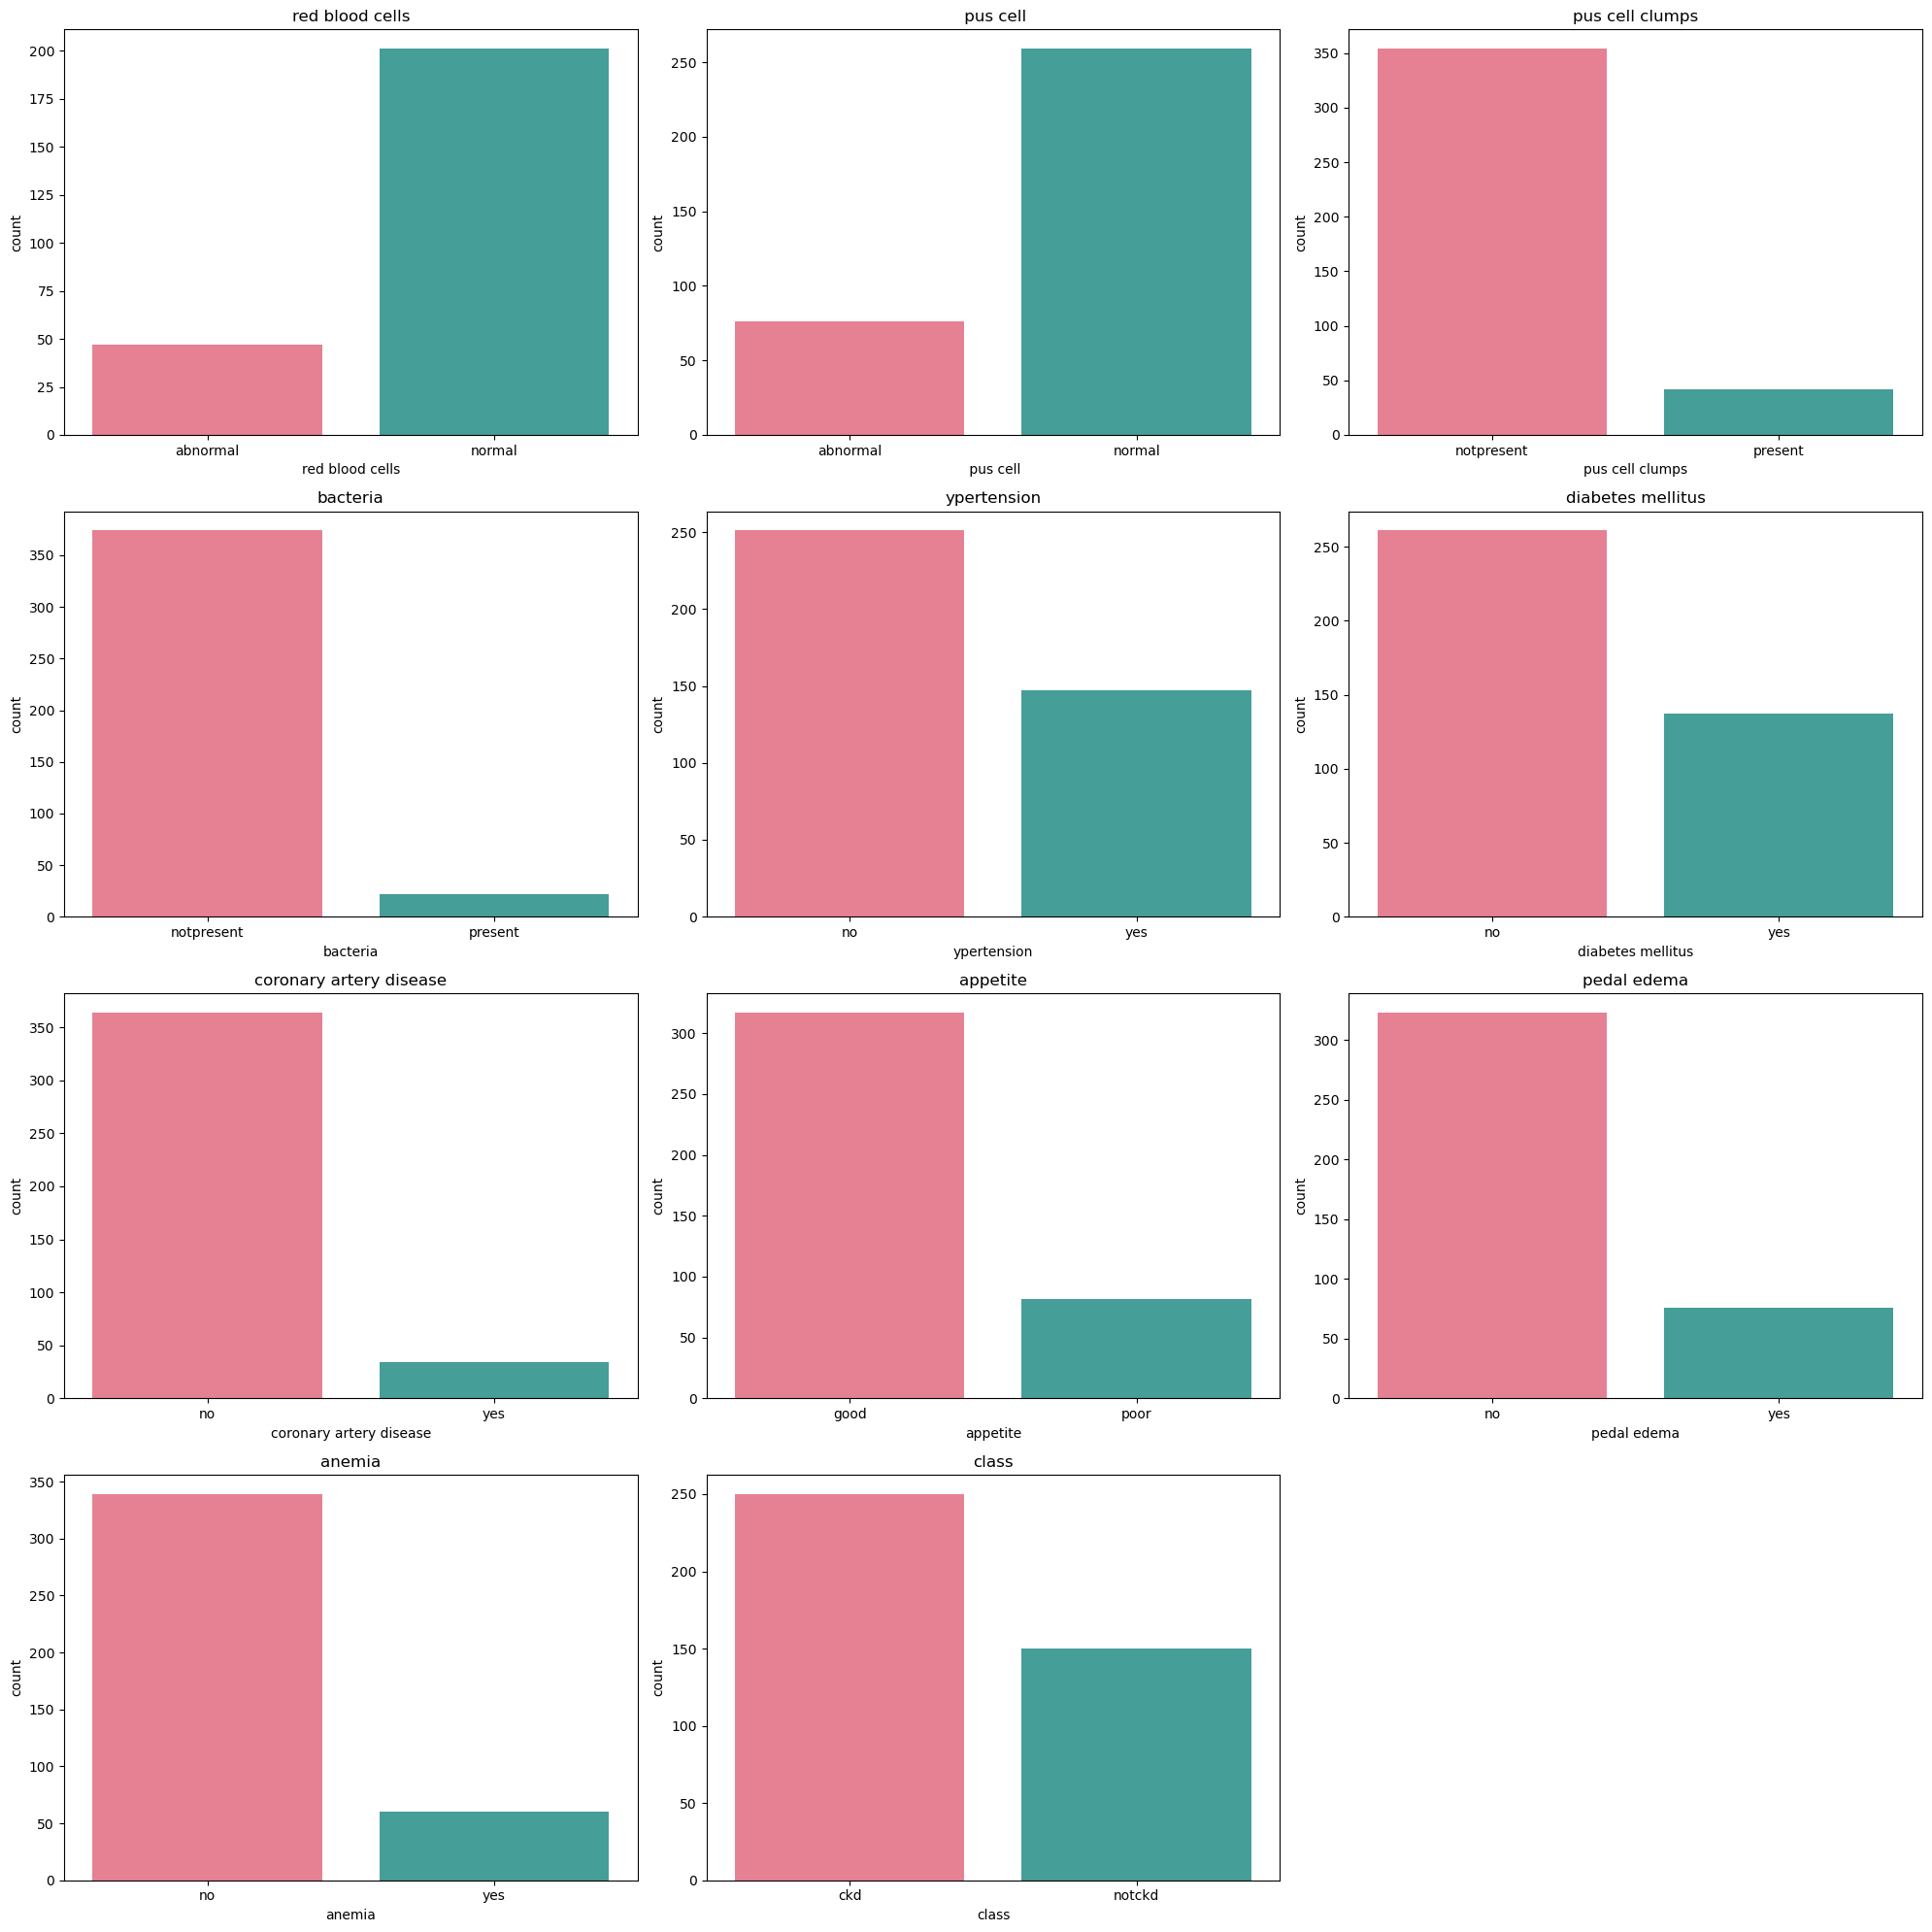

In [150]:
# Ensure categorical columns are of the category type
for col in categorical_columns:
    dataframe[col] = dataframe[col].astype('category')

plt.figure(figsize=(20,20))

for i, feature in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=dataframe, x=feature, palette="husl")  # You can change the palette as needed
    plt.title(feature)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'target Class')

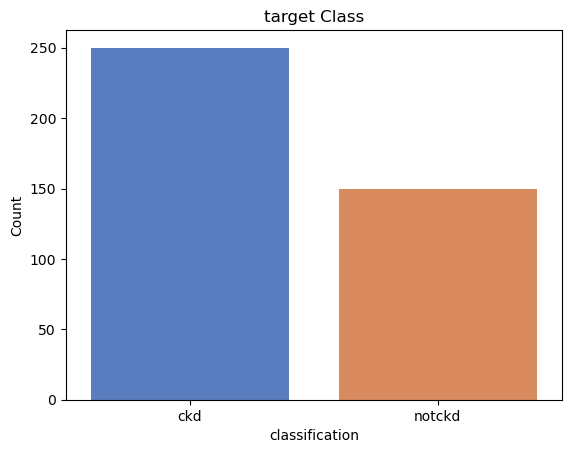

In [151]:
sns.countplot(x='class',data=dataframe,palette="muted")
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

In [152]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

# Check Correlations

In [153]:
# Example: Check columns with non-numeric values
non_numeric_columns = dataframe.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns or convert them to numeric if possible
numeric_dataframe = dataframe.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_dataframe = numeric_dataframe.corr()

Non-numeric columns: Index(['red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'ypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'pedal edema', 'anemia', 'class'],
      dtype='object')


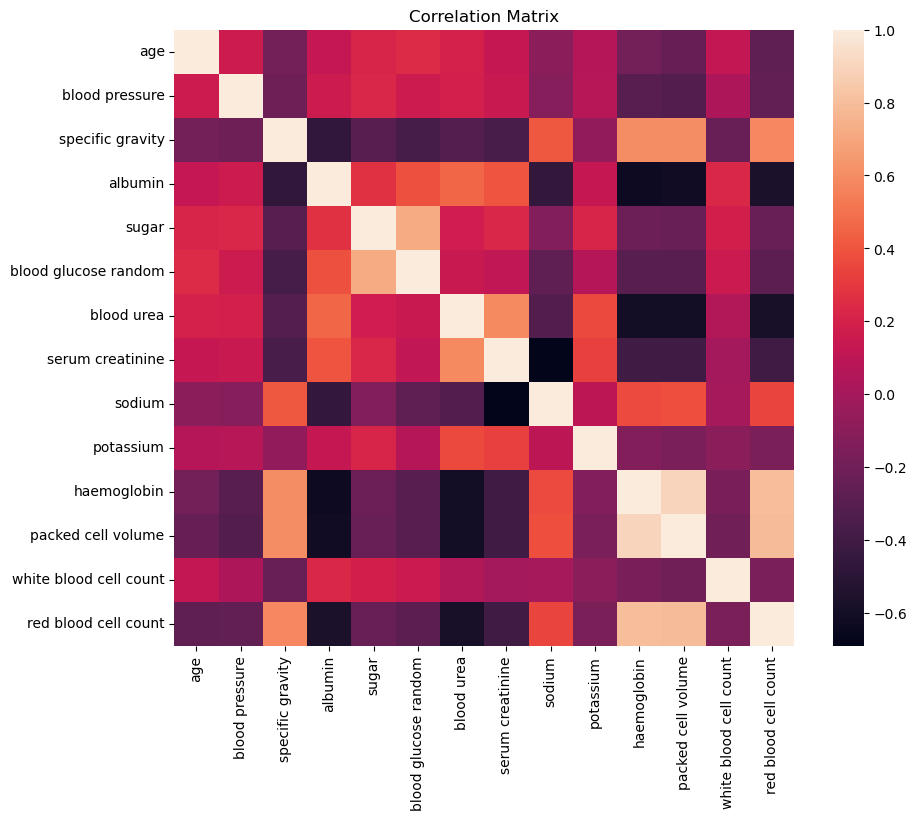

In [154]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_dataframe,  annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [155]:
import plotly.express as px

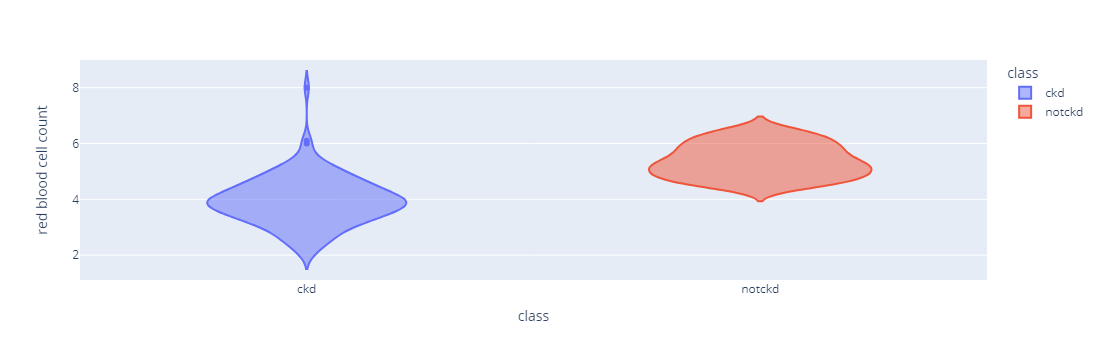

In [156]:
px.violin(dataframe,y='red blood cell count',x="class", color="class")

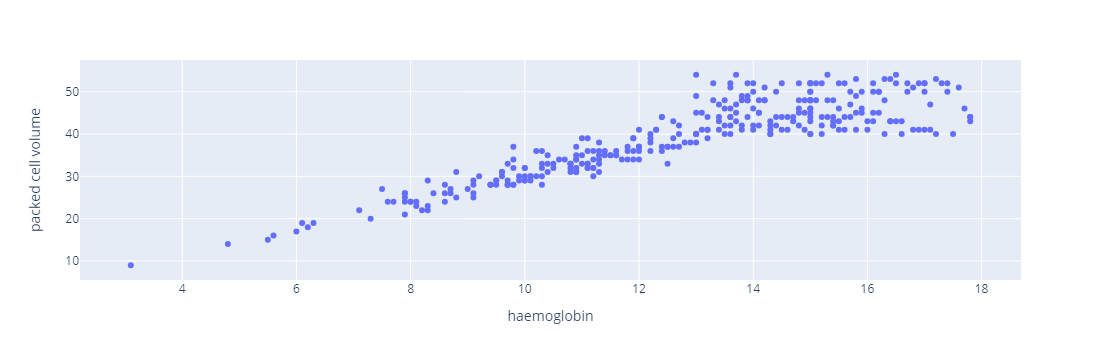

In [157]:
px.scatter(dataframe,'haemoglobin','packed cell volume')

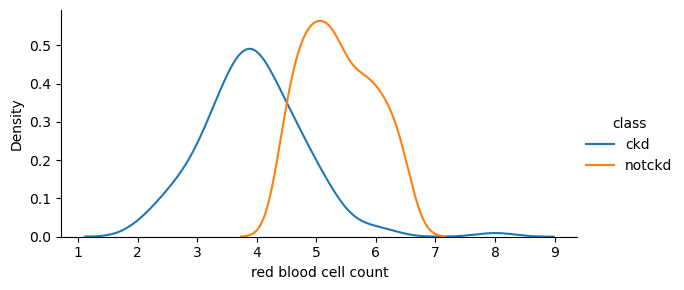

In [158]:
### Analyze distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(dataframe, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

In [159]:
# Defining violin and scatter plot & kde_plot functions
def violin(column):
    fig = px.violin(dataframe, y=column, x="class", color="class", box=True)
    return fig.show()

def scatters(column1,column2):
    fig = px.scatter(dataframe, x=column1, y=column2, color="class")
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(dataframe, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

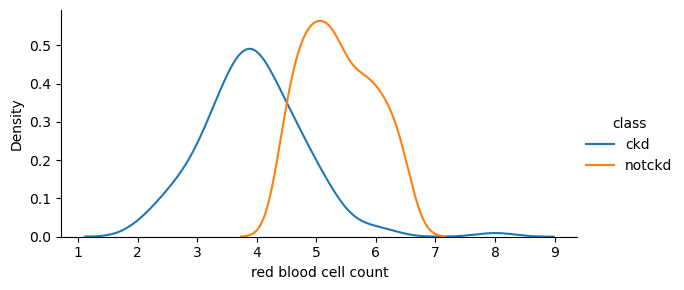

In [160]:
kde_plot('red blood cell count')

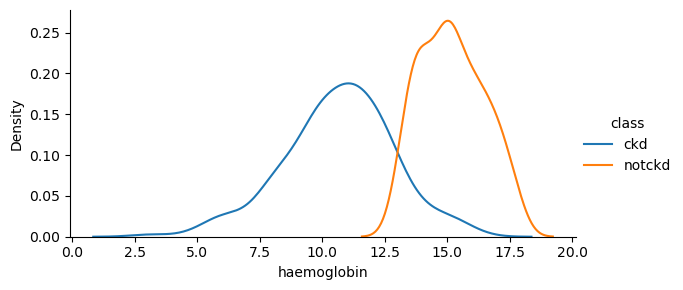

In [161]:
kde_plot('haemoglobin')

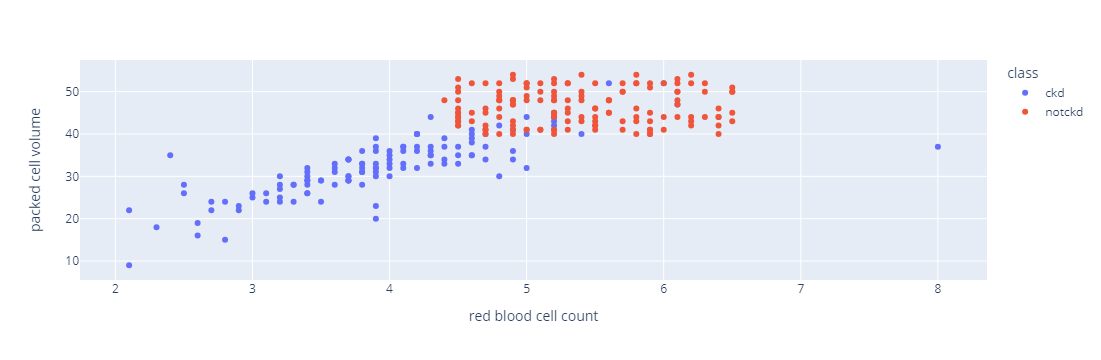

In [162]:
scatters('red blood cell count', 'packed cell volume')

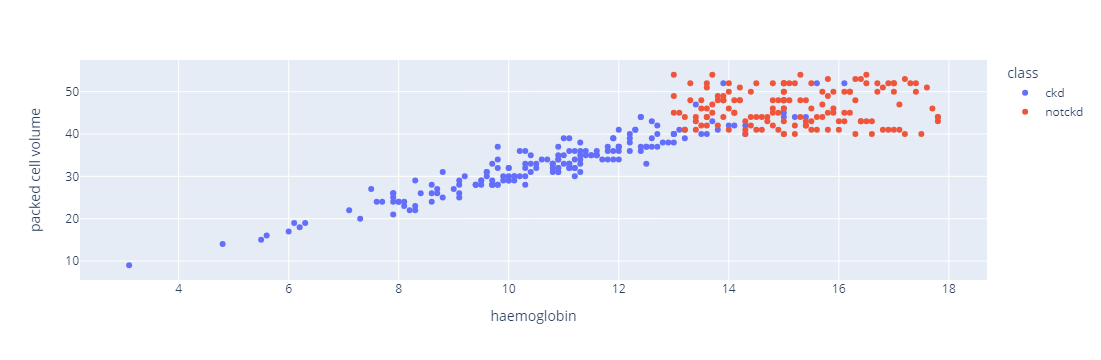

In [163]:
scatters('haemoglobin','packed cell volume')

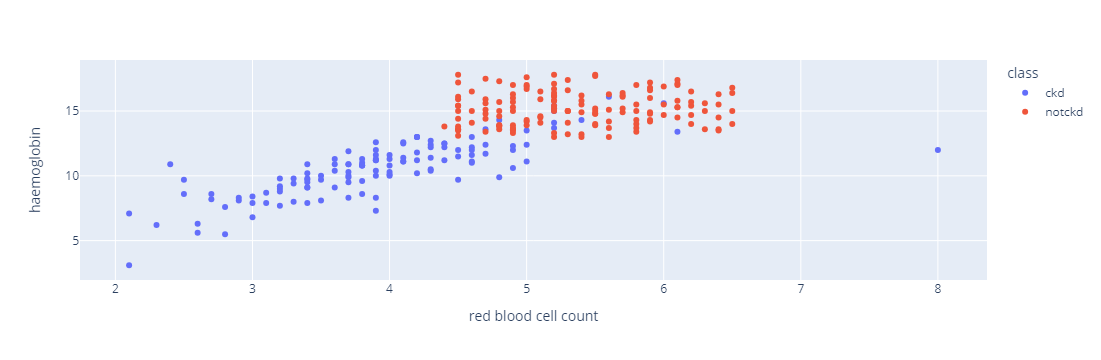

In [164]:
scatters('red blood cell count', 'haemoglobin')

In [165]:
1. Positive for Chronic Kidney Disease (CKD):
   - RBC count: 2 to <4.5
   - Hemoglobin: 3 to <13

2. Negative for Chronic Kidney Disease (CKD):
   - RBC count: >4.5 to 6.1
   - Hemoglobin: >13 to 17.8

SyntaxError: invalid syntax (1585877229.py, line 1)

In [166]:
dataframe.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [167]:
dataframe.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [168]:
categorical_columns

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [169]:
data=dataframe.copy()

# Fill missing values with random values.

In [170]:
data['red blood cells'].isnull().sum()

152

In [171]:
data['red blood cells'].dropna().sample()

107    normal
Name: red blood cells, dtype: category
Categories (2, object): ['abnormal', 'normal']

In [172]:
random_value = data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())

In [173]:
random_value

363      normal
246    abnormal
44     abnormal
285      normal
137      normal
         ...   
327      normal
258      normal
150      normal
329      normal
293      normal
Name: red blood cells, Length: 152, dtype: category
Categories (2, object): ['abnormal', 'normal']

In [174]:
random_value.index

Index([363, 246,  44, 285, 137, 316, 283, 263, 342,  90,
       ...
        49, 336, 337, 340, 198, 327, 258, 150, 329, 293],
      dtype='int64', length=152)

In [175]:
data[data['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [176]:
random_value.index=data[data['red blood cells'].isnull()].index

In [177]:
random_value.index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [178]:
random_value

0        normal
1      abnormal
5      abnormal
6        normal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: category
Categories (2, object): ['abnormal', 'normal']

In [179]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_value

In [180]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [181]:
def random_value_imputation(feature):
    random_selection = data[feature].dropna().sample(data[feature].isnull().sum())               
    random_selection.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_selection


In [182]:
random_value_imputation('red blood cells')

In [183]:
data[categorical_columns].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [184]:
random_value_imputation(' pus cell')

In [185]:
data[categorical_columns].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [186]:
# Since the rest of the features have fewer missing values, I can fill them using the mode concept.

In [187]:
mode_value =data['pus cell clumps'].mode()[0]
mode_value

'notpresent'

In [188]:
data['pus cell clumps']=data['pus cell clumps'].fillna(mode_value)

In [189]:
def impute_mode(feature):
    mode_value = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode_value)

In [190]:
for column in categorical_columns:
    impute_mode(column)

In [191]:
data[categorical_columns].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [192]:
#Lets check null values numeric columns

In [193]:
data[numerical_columns].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [194]:
# Let's fill missing values in numerical features using random value imputation.

In [195]:
for column in numerical_columns:
    random_value_imputation(column)

In [196]:
data[numerical_columns].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

# Performing Label Encoding

In [197]:
for column in categorical_columns:
    print('{} has {} categories'.format(column, data[column].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
lable_encoding = LabelEncoder()

In [200]:
for column in categorical_columns:
    data[column]=lable_encoding.fit_transform(data[column])

In [201]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,294.0,...,38.0,6000.0,3.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.3,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


# Feature Significance

In [202]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [203]:
independent_columns = [column for column in data.columns if column != 'class']
dependent_column = 'class'

In [204]:
X=data[independent_columns]
y=data[dependent_column]

In [205]:
best_features_selector = SelectKBest(score_func=chi2, k=20)
selected_features = best_features_selector.fit(X, y)

In [206]:
selected_features

SelectKBest(k=20, score_func=<function chi2 at 0x0000027DB5855DA0>)

In [207]:
#To obtain the scores (ranks) of the features, we can use the `scores_` attribute.
selected_features.scores_

array([1.11044248e+02, 7.98512720e+01, 5.25613057e-03, 2.33042774e+02,
       1.00495880e+02, 1.00785276e+01, 1.59480999e+01, 2.52000000e+01,
       1.32000000e+01, 2.28287764e+03, 2.61459989e+03, 3.55095350e+02,
       2.69491431e+01, 3.52297766e+00, 1.28158464e+02, 3.46072392e+02,
       1.49670222e+04, 2.11687037e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [208]:
feature_scores = pnd.DataFrame(selected_features.scores_, columns=["Score"])
feature_scores

,Score
0,111.044248
1,79.851272
2,0.005256
3,233.042774
4,100.495880
5,10.078528
6,15.948100
7,25.200000
8,13.200000
9,2282.877636


In [209]:
dataframecolumns=pnd.DataFrame(X.columns)
dataframecolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [210]:
features_ranking = pnd.concat([dataframecolumns, feature_scores], axis=1)
features_ranking

,0,Score
0,age,111.044248
1,blood pressure,79.851272
2,specific gravity,0.005256
3,albumin,233.042774
4,sugar,100.495880
5,red blood cells,10.078528
6,pus cell,15.948100
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2282.877636


In [211]:
# The higher the score, the more important the feature.
features_ranking.columns = ['Feature', 'Score']
features_ranking

,Feature,Score
0,age,111.044248
1,blood pressure,79.851272
2,specific gravity,0.005256
3,albumin,233.042774
4,sugar,100.495880
5,red blood cells,10.078528
6,pus cell,15.948100
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2282.877636


In [212]:
#retrive largest 10 values of Score column
features_ranking.nlargest(10,'Score')

,Feature,Score
16,white blood cell count,14967.022160
10,blood urea,2614.599894
9,blood glucose random,2282.877636
11,serum creatinine,355.095350
15,packed cell volume,346.072392
3,albumin,233.042774
14,haemoglobin,128.158464
0,age,111.044248
4,sugar,100.495880
18,ypertension,88.200000


In [213]:
top_features = features_ranking.nlargest(10, 'Score')['Feature'].values

In [214]:
X_new=data[top_features]

# Model Building

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [228]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [229]:
# Importing classification algorithms
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [230]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('K Neighbors Classifier',KNeighborsClassifier()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('GradientBoosting',GradientBoostingClassifier()))



LogisticRegression : 


[[60  6]
 [ 6 28]]


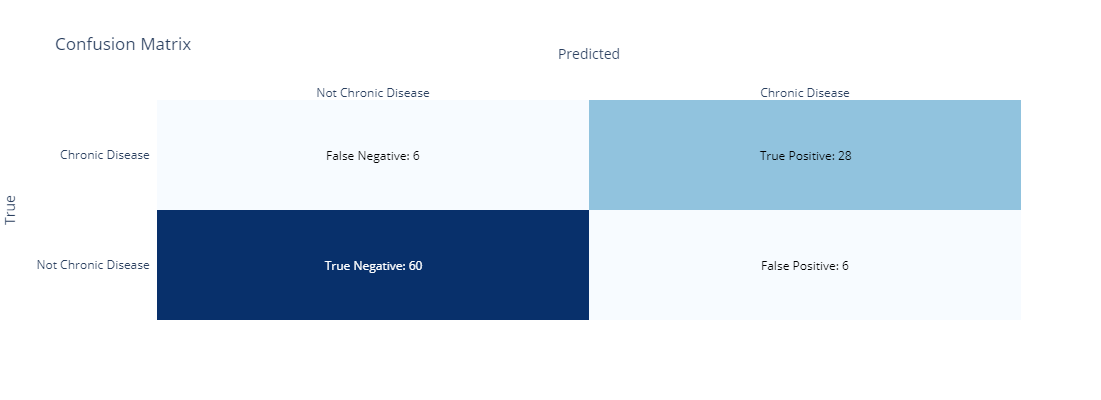

Accuracy Score:  0.88
Precision Score: 0.8235294117647058
Recall Score: 0.8235294117647058


K Neighbors Classifier : 


[[43 15]
 [23 19]]


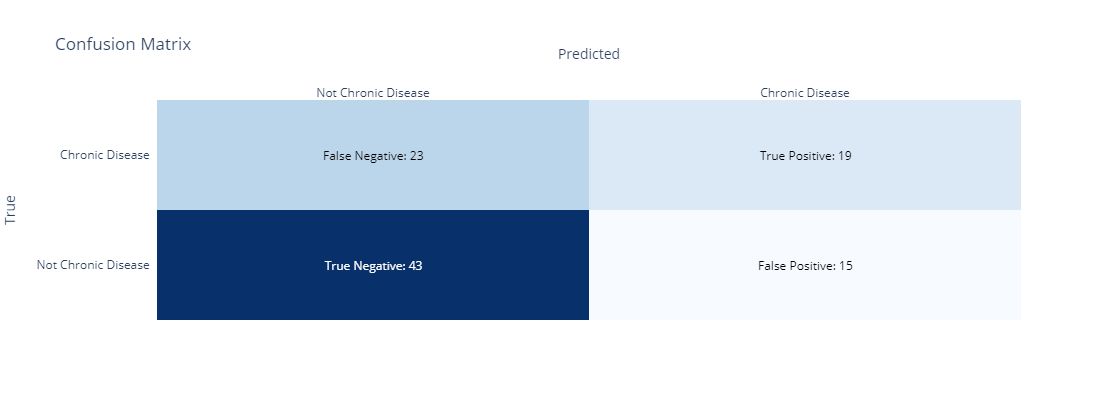

Accuracy Score:  0.62
Precision Score: 0.4523809523809524
Recall Score: 0.5588235294117647


DecisionTree : 


[[60  5]
 [ 6 29]]


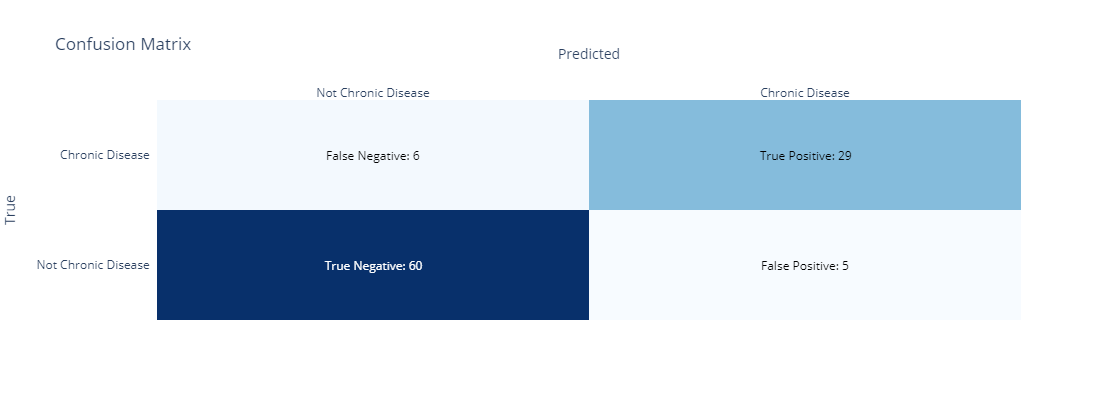

Accuracy Score:  0.89
Precision Score: 0.8285714285714286
Recall Score: 0.8529411764705882


RandomForest : 


[[65  3]
 [ 1 31]]


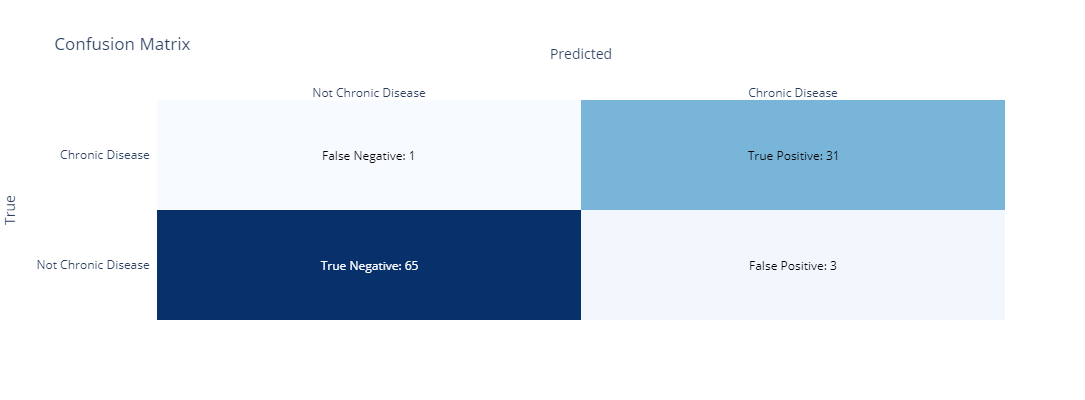

Accuracy Score:  0.96
Precision Score: 0.96875
Recall Score: 0.9117647058823529


Naive Bayes : 


[[62  2]
 [ 4 32]]


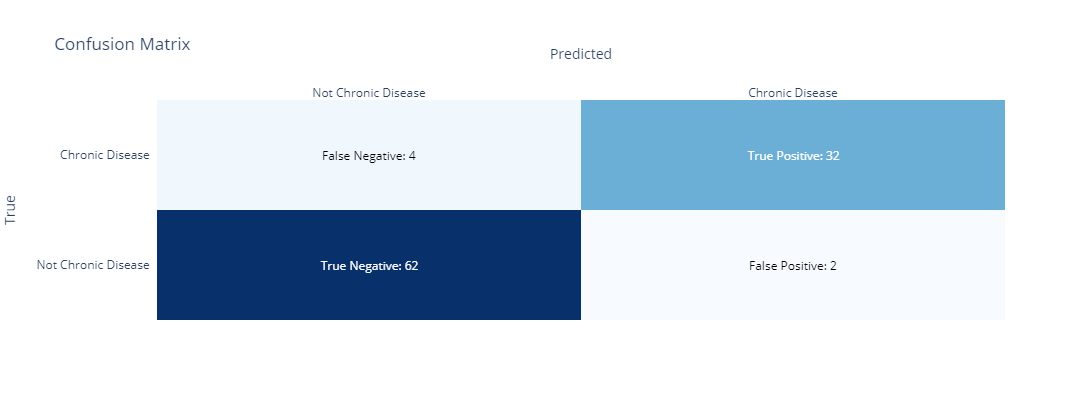

Accuracy Score:  0.94
Precision Score: 0.8888888888888888
Recall Score: 0.9411764705882353


GradientBoosting : 


[[62  2]
 [ 4 32]]


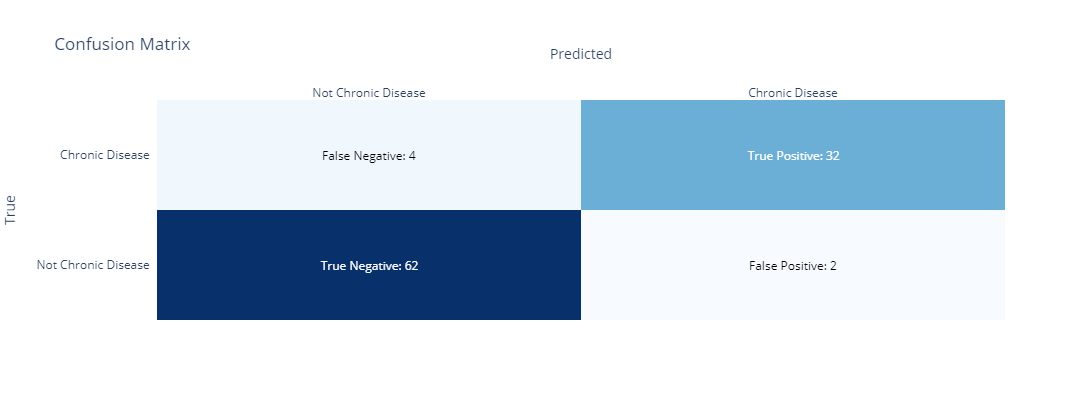

Accuracy Score:  0.94
Precision Score: 0.8888888888888888
Recall Score: 0.9411764705882353


In [231]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

for name,model in models:
    print('\n')
    print(name,": ")
    print('\n')
    
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)

    print(confusion_matrix(predictions,y_test))

    cm = confusion_matrix(predictions,y_test)


    # Sample data
    y_truet = [0, 1, 0, 1]
    y_predt = [0, 1, 1, 0]

    # Compute confusion matrix
    #cmt = confusion_matrix(y_truet, y_predt)
    classes = ['Not Chronic Disease', 'Chronic Disease']

    cm_labels = [
        ["True Negative: " + str(cm[0][0]), "False Positive: " + str(cm[0][1])],
        ["False Negative: " + str(cm[1][0]), "True Positive: " + str(cm[1][1])]
    ]

    # Create confusion matrix heatmap
    fig = ff.create_annotated_heatmap(
        z=cm, x=classes, y=classes, 
        annotation_text=cm_labels, colorscale='Blues'
        )

    fig.update_layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted'),
        yaxis=dict(title='True'),
        width = 600,
        height = 400
        )

    fig.show()


    print('Accuracy Score: ',accuracy_score(predictions,y_test))
    #Calculate precision and recall
    precision = precision_score(y_test,predictions,average='binary')
    recall = recall_score(y_test,predictions,average='binary')
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")


